A. Isolate the period of relevant overlap (1879-1933) and plot the timeseries. Create a linear regression model for annual flow using peak flow as an explanatory variable.

In [ ]:
# import packages to be used
import numpy as np
import pandas as pd
import os
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

In [ ]:
df_dalles = pd.read_csv('dalles_flow.csv', skiprows=2)
df_dalles.head()

,Year,Peak Daily (cfs),Annual Mean (cfs)
0,1858,563000,NaN
1,1859,847000,NaN
2,1860,668000,NaN
3,1861,618000,NaN
4,1862,948000,NaN


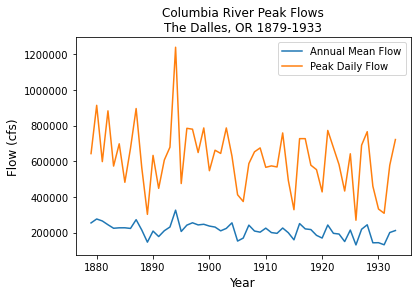

In [ ]:
df_sub = df_dalles.loc[df_dalles['Year'].between(1879,1933)]

plt.plot(df_sub['Year'],df_sub['Annual Mean (cfs)'], label='Annual Mean Flow')
plt.plot(df_sub['Year'],df_sub['Peak Daily (cfs)'], label='Peak Daily Flow')
plt.title('Columbia River Peak Flows\nThe Dalles, OR 1879-1933')
plt.xlabel('Year', size = 12)
plt.ylabel('Flow (cfs)', size = 12)
plt.ticklabel_format(axis='y', style='plain')
plt.legend()

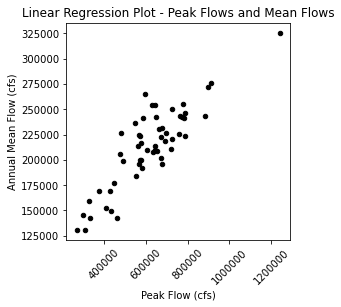

In [ ]:
# adapted from lab 4-1
fig, ax = plt.subplots(figsize=(4,4))

# Scatterplot
df_sub.plot.scatter(x='Peak Daily (cfs)', y='Annual Mean (cfs)', c='k', ax=ax);

ax.set_xlabel('Peak Flow (cfs)')
ax.set_ylabel('Annual Mean Flow (cfs)')
ax.set_title('Linear Regression Plot - Peak Flows and Mean Flows')
plt.xticks(rotation=45)
plt.ticklabel_format(axis='x', style='plain')

In [ ]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x=df_sub['Peak Daily (cfs)'], y=df_sub['Annual Mean (cfs)'])
print('B0 : {}'.format(np.round(intercept,4)))
print('B1 : {}'.format(np.round(slope,4)))

print('R^2 : {}'.format(np.round(rvalue**2,3)))
print('R : {}'.format(np.round(rvalue,3)))
print('stderr : {}'.format(np.round(stderr,3)))

B0 : 92295.1358
B1 : 0.1958
R^2 : 0.753
R : 0.868
stderr : 0.015


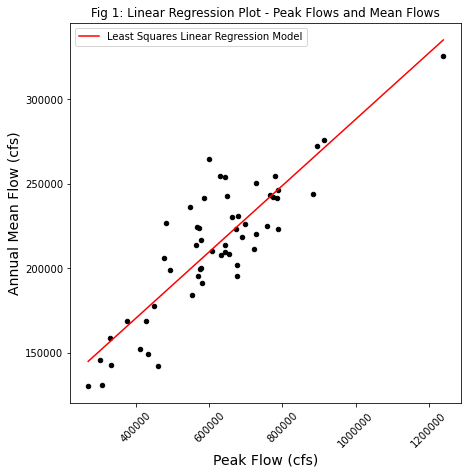

In [ ]:
# adapted from lab 4-1
fig, ax = plt.subplots(figsize=(7,7))
# Create points for the regression line
x = np.linspace(df_sub['Peak Daily (cfs)'].min(),
                df_sub['Peak Daily (cfs)'].max(),
                df_sub['Peak Daily (cfs)'].size) # x coordinates from min and max values of SLI_max
y_linregress = slope * x + intercept # y coordinates using the slope and intercept from our linear regression
# Scatterplot
df_sub.plot.scatter(x='Peak Daily (cfs)', y='Annual Mean (cfs)', c='k', ax=ax)
ax.plot(x,y_linregress,'-r', label='Least Squares Linear Regression Model')

ax.set_xlabel('Peak Flow (cfs)', size=14)
ax.set_ylabel('Annual Mean Flow (cfs)', size=14)
ax.set_title('Fig 1: Linear Regression Plot - Peak Flows and Mean Flows')
ax.legend()
plt.xticks(rotation=45)
plt.ticklabel_format(axis='x', style='plain')

B. How much of the variance is explained by the resulting model?

In [ ]:
# calculate R^2 value
print('r-squared = {}'.format(rvalue**2))

r-squared = 0.752893728615448


The $R^2$ value is a proxy for the fraction of the variance explained by the model, thus this model accounts for about 75% of the variance in the dataset.

C. Estimate the 95% confidence intervals for the annual flow predictions from 1858-1878, and plot them with the central tendency (the central tendency is the prediction from the regression model).

To do this, I want to estimate the confidence intervals for the prediction value: mean annual flow. 

In [ ]:
y = df_sub['Annual Mean (cfs)']
x = df_sub['Peak Daily (cfs)']
y_predicted = intercept + slope*x
residuals = (y-y_predicted)

In [ ]:
n = len(x)
# sum of squared errors
sse = np.sum(residuals**2)

# total sum of squares (y)
sst = np.sum( (y - np.mean(y))**2 )

# total sum of squares (x)
sst_x = np.sum( (x - np.mean(x))**2 )

# correlation coefficient
r_squared = 1 - sse/sst
r = np.sqrt( r_squared )

# standard error of regression
s = np.sqrt(sse/(n-2))

In [ ]:
# create predicted values
# an array of x values
p_x = np.linspace(x.min(),x.max(),100)

# using our model parameters to predict y values
p_y = intercept + slope*p_x

# compute error of prediction for each p_x
sigma_ep = np.sqrt( s**2 * (1+ 1/n + ( ( n*(p_x-x.mean())**2 ) / ( n*np.sum(x**2) - np.sum(x)**2 ) ) ) )
# set our confidence interval
alpha = 0.05
# 
n = len(p_x)
dof = n - 2

t = stats.t.ppf(1-alpha/2, dof)

p_y_lower = p_y - t * sigma_ep
p_y_upper = p_y + t * sigma_ep


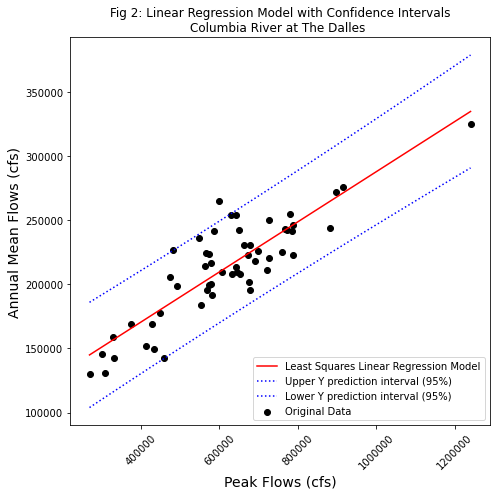

In [ ]:
# adapted from lab 4-1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7), tight_layout=True)

# Scatterplot of original data
ax.scatter(x, y, c='k', label='Original Data')

# Plot the regression line, we only need two points to define a line, use xmin and xmax
ax.plot([x.min(), x.max()], [intercept + slope*x.min(), intercept + slope*x.max()] , '-r', label='Least Squares Linear Regression Model')

# Plot confidence limits on our predicted Y values
ax.plot(p_x, p_y_upper, ':b', label='Upper Y prediction interval (95%)')
ax.plot(p_x, p_y_lower, ':b', label='Lower Y prediction interval (95%)')

# Add legend
plt.legend(loc='lower right');

# Add axes labels and title
ax.set_xlabel('Peak Flows (cfs)', size=14)
ax.set_ylabel('Annual Mean Flows (cfs)', size=14)
ax.set_title('Fig 2: Linear Regression Model with Confidence Intervals\nColumbia River at The Dalles ')
plt.xticks(rotation=45)
plt.ticklabel_format(axis='x', style='plain')

In [ ]:
# Use our linear model to make predictions for entire data set:
annual_linreg_pred = slope * df_dalles['Peak Daily (cfs)'] + intercept

In [ ]:
annual_linreg_pred

0     202537.896149
1     258148.808988
2     223098.268853
3     213307.615184
4     277925.929399
          ...      
88    206454.157616
89    198425.821608
90    290066.339948
91    214482.493625
92    237980.062430
Name: Peak Daily (cfs), Length: 93, dtype: float64

D. Now create a non-parametric, quantile-based regression model using the same data.

<ipython-input-14-31d4e86daaaf>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation=45)


[Text(0.0, 0, '0.0'),
 Text(200000.0, 0, '200000.0'),
 Text(400000.0, 0, '400000.0'),
 Text(600000.0, 0, '600000.0'),
 Text(800000.0, 0, '800000.0'),
 Text(1000000.0, 0, '1000000.0'),
 Text(1200000.0, 0, '1200000.0'),
 Text(1400000.0, 0, '1400000.0')]

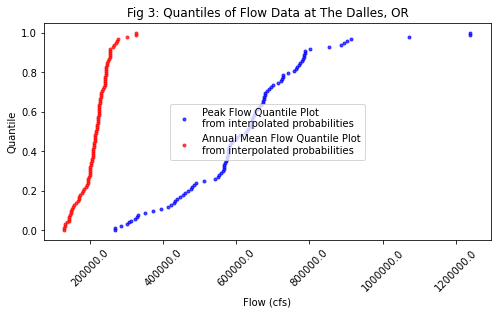

In [ ]:
# adapted from lab 4-2
# We can also create quantiles by picking arbitrary quantile values, then using the scipy.stats.mstats.mquantiles function
fig,ax = plt.subplots( ncols=1, figsize=(8,4))
quantiles = np.linspace(0,1,100) # 100 quantile values linearly spaced between 0 and 1
ax.plot(stats.mstats.mquantiles(df_sub['Peak Daily (cfs)'], quantiles), quantiles, 
         'b.', label='Peak Flow Quantile Plot\nfrom interpolated probabilities', alpha=0.7)
ax.plot(stats.mstats.mquantiles(df_sub['Annual Mean (cfs)'], quantiles), quantiles, 
         'r.', label='Annual Mean Flow Quantile Plot\nfrom interpolated probabilities', alpha=0.7)

ax.set_ylabel('Quantile')
ax.set_xlabel('Flow (cfs)')

ax.set_title('Fig 3: Quantiles of Flow Data at The Dalles, OR')
ax.legend(loc="center")
xlabels = ax.get_xticks()
ax.set_xticklabels(xlabels, rotation=45)


E. Plot the predictions and residuals for the two different prediction models for the training period (1879-1933), and plot the model predictions for the 1858-1878 data for the two different models. Is there a substantial difference between the two model formulations? Discuss any differences that you observe.

Create Quantiles:

In [ ]:
from scipy.interpolate import interp1d
quantiles = np.linspace(0,1,100)

# This is our empirical cdf of the Slide Canyon data, which also includes values down to 0 and up to 1.
peak_ordered = stats.mstats.mquantiles(df_sub['Peak Daily (cfs)'], quantiles)

# This is our empirical cdf of the Blue Canyon data, which also includes values down to 0 and up to 1.
annual_ordered = stats.mstats.mquantiles(df_sub['Annual Mean (cfs)'], quantiles)

In [ ]:
# Create our interpolation function for looking up a quantile given a value of peak values at The Dalles
f_peak = interp1d(peak_ordered, quantiles)
# Create our interpolation function for looking up annual mean at given a quantile
g_annual = interp1d(quantiles, annual_ordered)

# Now, we can create a prediction for every peak value dataset to come up with a matching prediction for the annual mean dataset
annual_predicted=g_annual( f_peak( df_dalles['Peak Daily (cfs)']) )

Calcualte quantile residuals

In [ ]:
residuals_quant = (df_sub['Annual Mean (cfs)'] - annual_predicted[21:76])

Plot linear and quantile regression predictions against observations for annual mean flow

Text(0.5, 0.98, 'Fig 4: Timeline of Annual Mean Flow at The Dalles')

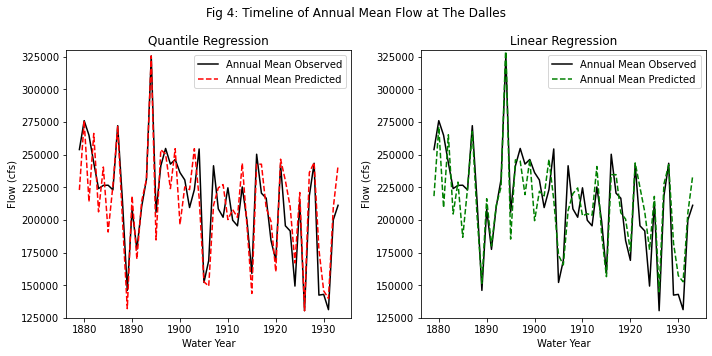

In [ ]:
# And we can see how well this did by making a time series plot of our actual and predicted values
# Original data:
fig, ax = plt.subplots(ncols=2, figsize=(10,5), tight_layout=True)
ax[0].plot(df_sub['Year'],df_sub['Annual Mean (cfs)'],'k-', label='Annual Mean Observed')
ax[1].plot(df_sub['Year'],df_sub['Annual Mean (cfs)'],'k-', label='Annual Mean Observed')
# Predicted with Quantile regression annual mean
ax[0].plot(df_sub['Year'],annual_predicted[21:76],'r--', label='Annual Mean Predicted')
ax[0].set_xlabel('Water Year')
ax[0].set_ylabel('Flow (cfs)')
ax[0].set_ylim(1.25e5,3.3e5)
ax[0].legend()
ax[0].set_title('Quantile Regression')
# Predicted with linear regression annual mean
ax[1].plot(df_sub['Year'],annual_linreg_pred[21:76],'g--', label='Annual Mean Predicted')
ax[1].set_xlabel('Water Year')
ax[1].set_ylabel('Flow (cfs)')
ax[1].legend()
ax[1].set_ylim(1.25e5,3.3e5)
ax[1].set_title('Linear Regression')
fig.suptitle('Fig 4: Timeline of Annual Mean Flow at The Dalles')


Plot residuals for linear and quantile regressions

Standard Deviation of Linear Regression Residuals: 19646.429653148003
Standard Deviation of Quantile Regression Residuals: 19537.70914758039


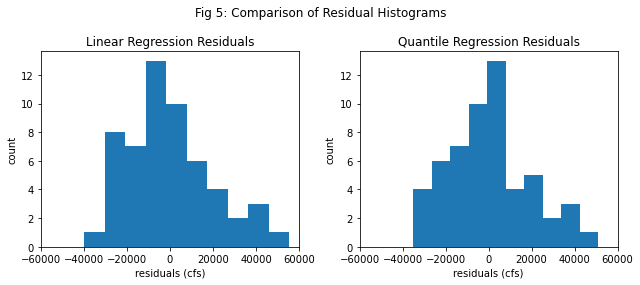

In [ ]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(9,4))
# linear regressions
ax1.hist(residuals)
ax1.set_xlabel('residuals (cfs)')
ax1.set_xlim(-60000,60000)
ax1.set_ylabel('count')
ax1.set_title('Linear Regression Residuals')
print('Standard Deviation of Linear Regression Residuals: {}'.format(residuals.std()))
# Quantile regressions
ax2.hist(residuals_quant)
ax2.set_xlabel('residuals (cfs)')
ax2.set_ylabel('count')
ax2.set_xlim(-60000,60000)
ax2.set_title('Quantile Regression Residuals')
print('Standard Deviation of Quantile Regression Residuals: {}'.format(residuals_quant.std()))
f.suptitle('Fig 5: Comparison of Residual Histograms')
f.tight_layout()

Plot predicted flow values for 1858 to 1878 period

Text(0.5, 1.0, 'Fig 6: Predicted Annual Mean Flow at The Dalles')

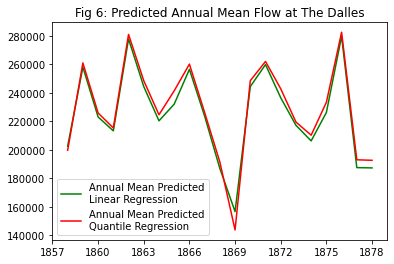

In [ ]:
from matplotlib.ticker import MaxNLocator
# And we can see how well this did by making a time series plot of our actual and predicted values
df_predict = df_dalles.loc[df_dalles['Year'].between(1858,1878)]
# Original data:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(df_predict['Year'],annual_linreg_pred[0:21],'g-', label='Annual Mean Predicted\nLinear Regression')
ax.plot(df_predict['Year'],annual_predicted[0:21],'r-', label='Annual Mean Predicted\nQuantile Regression')
ax.legend()

ax.set_title('Fig 6: Predicted Annual Mean Flow at The Dalles')


In [ ]:
mean_diff = annual_linreg_pred[0:21].mean()-annual_predicted[0:21].mean()
print(mean_diff)

-3026.3649783962464


In all, the linear and quantile regressions for this dataset match each other rather well. However, it appears the quantile regression may be slightly better at predicting the annual mean flow because it better captures the observed annual flow extrema (Fig 4), and it has a slightly lower standard deviation for the residuals (Fig 5). Comparing the predicted values in Fig 6, the quantile regression generally exceeds the linear regression value (mean difference is approximatelty 3000 cfs). 

## Problem 2

The first column is the water year, and data in the next three columns are values for total precipitation (mm), daily maximum temperature (°C), and daily minimum temperature (°C) averaged from October-March over the Pacific Northwest Cascades in Washington and Oregon. The last column is an estimate of April 1st snow water equivalent (in mm, the water content of the snowpack on this day) from model simulations, averaged over the same domain.

A. Calculate the long-term trend in April 1 SWE from 1916-2003 by fitting a linear model to the data. Estimate the uncertainty in the trend by evaluating a 95% confidence interval around the estimate of B1. That is, report the trend as: Trend = B1 ± t*sB1

In [ ]:
df_cascade = pd.read_excel('cascades_swe.xlsx',skiprows=8)
df_cascade = df_cascade.drop(columns=['Unnamed: 0'])

In [ ]:
df_cascade.head()

,Water Year,oct-mar precip,oct-mar tmax,oct-mar tmin,April 1 SWE
0,1916,1154.570,5.03776,-5.06206,393.719
1,1917,820.952,4.56727,-6.50644,377.514
2,1918,1095.650,7.86584,-3.23471,310.131
3,1919,1041.050,5.80953,-4.22977,287.759
4,1920,817.106,5.14475,-5.36376,237.118


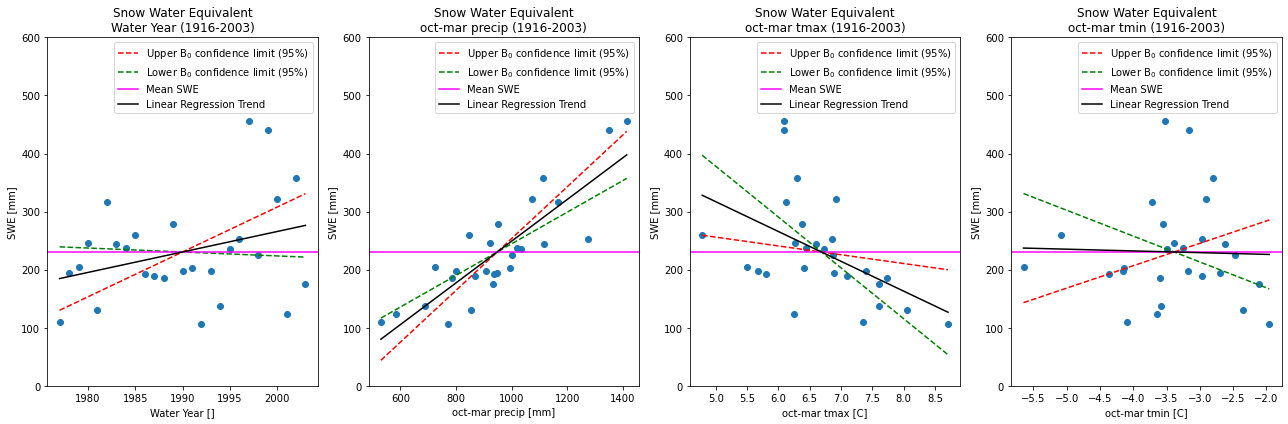

In [31]:
cols = df_cascade.columns[0:-1]
units = ['','mm','C', 'C']
d = dict(zip(cols, units))
fig, axs = plt.subplots(ncols=4, figsize=(18,6), tight_layout = True)
output = pd.DataFrame(columns = ['slope', 'intercept', 'rvalue', 'r_squared','pvalue', 'stderr','sigma'], index=cols)
for i,col in enumerate(d.keys()):
    # use the linear regression function
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(df_cascade[col], df_cascade['April 1 SWE'])
    # Create points for the regression line
    x = np.linspace(df_cascade[col].min(), df_cascade[col].max(), df_cascade[col].size) # x coordinates from min and max values 
    y = slope * x + intercept # y coordinates using the slope and intercept from our linear regression
    # compute SST for col
    sst_x = np.sum( (df_cascade[col] - np.mean(df_cascade[col]))**2 )
    # Compute the standard error
    sigma = stderr * np.sqrt(sst_x)
    r_squared = rvalue**2
    # output info
    to_append = [slope, intercept, rvalue, r_squared, pvalue, stderr,sigma]
    output.loc[col] = to_append
    # conf interval calculations
    sB1 = sigma/np.sqrt(sst_x)
    # t-value for alpha/2 with n-2 degrees of freedom
    alpha = 0.05
    t = stats.t.ppf(1-alpha/2, dof)
    # compute upper and lower b1 limits
    B1_upper = slope + t * sB1
    B1_lower = slope - t * sB1
    # compute corresponding b0s
    B0_upper = df_cascade['April 1 SWE'].mean() - B1_upper*df_cascade[col].mean()
    B0_lower = df_cascade['April 1 SWE'].mean() - B1_lower*df_cascade[col].mean()
    # Plot the upper and lower confidence limits for the standard error of the gradient (slope)
    axs[i].plot([x.min(), x.max()],
                [B0_upper + B1_upper*df_cascade[col].min(), B0_upper + B1_upper*df_cascade[col].max()] ,
                '--r',
                label='Upper B$_0$ confidence limit (95%)')
    axs[i].plot([x.min(), x.max()],
                [B0_lower + B1_lower*df_cascade[col].min(), B0_lower + B1_lower*df_cascade[col].max()] ,
                '--g',
                label='Lower B$_0$ confidence limit (95%)')
    # plot up other items
    axs[i].axhline(df_cascade['April 1 SWE'].mean(),color='magenta', label='Mean SWE')
    axs[i].plot(x,y,'k-',label='Linear Regression Trend')
    axs[i].scatter(df_cascade[col],df_cascade['April 1 SWE'])
    axs[i].set_ylim(0,600)
    axs[i].set_xlabel(col+' [{}]'.format(d[col]))
    axs[i].set_ylabel('SWE [mm]')
    axs[i].legend()
    axs[i].set_title('Snow Water Equivalent\n{} (1916-2003)'.format(col))

In [ ]:
output

**B. Is the trend statistically significant with 95% confidence? Can we reject the null hypothesis that the trend is equal to zero?**

**Note: Only the far left plot above is relevant to the question, I just wanted to visualize the other variables.** 

The null hypothesis follows that $\hat{B_1} = B_1$ (i.e. slope is equal to 0). The alternate hypothesis states $\hat{B_1} \neq B_1$. The left-most plot above shows that we cannot reject the null hypothesis: there is no long term trend in SWE with time. While the central tendency shows a slight negative trend overall, the mean value of SWE ($B_1 = 0$) falls within the surrounding 95% confidence bounds and thus the null hypothesis must be accepted. 

With respect to the other variable plotted, precipitation appears to be the closest predictor of SWE and a good fit for a linear model, but all three (precipitation, minimum temperature, and maximum temperature) can reject the null hypothesis.

**C. Repeat this analysis (parts A and B) for just the more recent period, 1976-2003. Discuss any similarities or differences in the results of the two time periods.**

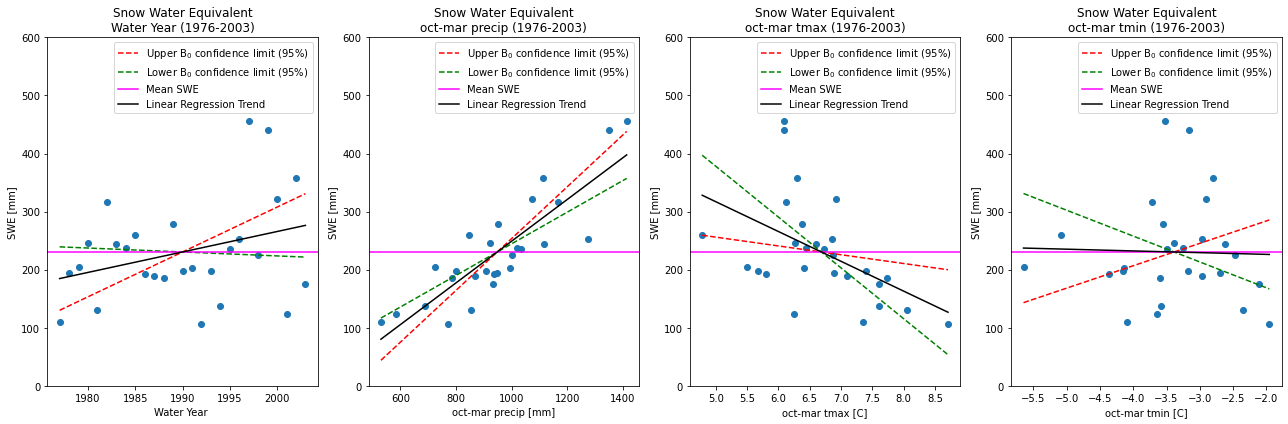

In [35]:
cols = df_cascade.columns[0:-1]
units = ['','[mm]','[C]', '[C]']
d = dict(zip(cols, units))
df_cascade = df_cascade[df_cascade['Water Year'] > 1976]
fig, axs = plt.subplots(ncols=4, figsize=(18,6), tight_layout = True)
output = pd.DataFrame(columns = ['slope', 'intercept', 'rvalue', 'r_squared','pvalue', 'stderr','sigma'], index=cols)
for i,col in enumerate(d.keys()):
    # use the linear regression function
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(df_cascade[col], df_cascade['April 1 SWE'])
    # Create points for the regression line
    x = np.linspace(df_cascade[col].min(), df_cascade[col].max(), df_cascade[col].size) # x coordinates from min and max values 
    y = slope * x + intercept # y coordinates using the slope and intercept from our linear regression
    # compute SST for col
    sst_x = np.sum( (df_cascade[col] - np.mean(df_cascade[col]))**2 )
    # Compute the standard error
    sigma = stderr * np.sqrt(sst_x)
    r_squared = rvalue**2
    # output info
    to_append = [slope, intercept, rvalue, r_squared, pvalue, stderr,sigma]
    output.loc[col] = to_append
    # conf interval calculations
    sB1 = sigma/np.sqrt(sst_x)
    # t-value for alpha/2 with n-2 degrees of freedom
    alpha = 0.05
    t = stats.t.ppf(1-alpha/2, dof)
    # compute upper and lower b1 limits
    B1_upper = slope + t * sB1
    B1_lower = slope - t * sB1
    # compute corresponding b0s
    B0_upper = df_cascade['April 1 SWE'].mean() - B1_upper*df_cascade[col].mean()
    B0_lower = df_cascade['April 1 SWE'].mean() - B1_lower*df_cascade[col].mean()
    # Plot the upper and lower confidence limits for the standard error of the gradient (slope)
    axs[i].plot([x.min(), x.max()],
                [B0_upper + B1_upper*df_cascade[col].min(), B0_upper + B1_upper*df_cascade[col].max()] ,
                '--r',
                label='Upper B$_0$ confidence limit (95%)')
    axs[i].plot([x.min(), x.max()],
                [B0_lower + B1_lower*df_cascade[col].min(), B0_lower + B1_lower*df_cascade[col].max()] ,
                '--g',
                label='Lower B$_0$ confidence limit (95%)')
    # plot up other items
    axs[i].axhline(df_cascade['April 1 SWE'].mean(),color='magenta', label='Mean SWE')
    axs[i].plot(x,y,'k-',label='Linear Regression Trend')
    axs[i].scatter(df_cascade[col],df_cascade['April 1 SWE'])
    axs[i].set_ylim(0,600)
    axs[i].set_xlabel(col+' {}'.format(d[col]))
    axs[i].set_ylabel('SWE [mm]')
    axs[i].legend()
    axs[i].set_title('Snow Water Equivalent\n{} (1976-2003)'.format(col))

**Note: Only the far left plot above is relevant to the question, I just wanted to visualize the other variables.** 

The null hypothesis follows that $\hat{B_1} = B_1$. The alternate hypothesis states $\hat{B_1} \neq B_1$. The left-most plot above shows that, again, we cannot reject the null hypothesis: there is no long term trend in SWE over time. This central tendency for the subsetted time series shows a slight increasing trend in SWE since 1976. Interestingly, this is opposite to the trend seen above from 1916 to 2003. I imagine this fed the debate as to whether or not snow was increasing in the Cascades. For both the 1916-2003 and 1976-2003, the null hypothesis is very close to the confidence intervals, meaning that the choice of confidence bounds could play a big role in whether or not the null hypothesis is accepted or rejected.

However, the mean value of SWE ($B_1 = 0$) still falls within the confidence bounds and thus the null hypothesis is accepted. With respect to the other variable plotted, precipitation again appears to be the closest predictor of SWE and a good fit for a linear model. Both minimum and maximum temperature perform worse with respect to SWE, and the null hypothesis is accepted for minimum temperature.

In [32]:
output

,slope,intercept,rvalue,r_squared,pvalue,stderr,sigma
Water Year,3.521897,-6778.106831,0.315729,0.099685,0.10865,2.116846,85.67344
oct-mar precip,0.359232,-110.160273,0.853812,0.728994,0.0,0.043806,47.004343
oct-mar tmax,-51.314273,573.622093,-0.490632,0.240719,0.009367,18.226936,78.67741
oct-mar tmin,-2.974569,220.394919,-0.028409,0.000807,0.88814,20.932835,90.255486


## Problem 3: Visualization

1. This is not from an individual paper, but I recently discovered the new USGS Next Generation data pages for river gaging stations throughout the United States. I think this interface is a large improvement over the previous circa-1995 page. Data visualizations are much easier to see and interact with, and site specific data is much easier to find. Here is an example for the Skykomish River at Gold Bar: https://waterdata.usgs.gov/monitoring-location/12134500/#parameterCode=00065&period=P7D
2. This figure was taken from Slater et al., 2001 and shows the time variance of albedo with SWE for 21 different snow model runs. I think the equations for albedo are difficult to visualize in reality and I thought this figure does a nice job of presenting the many different ways snow albedo 
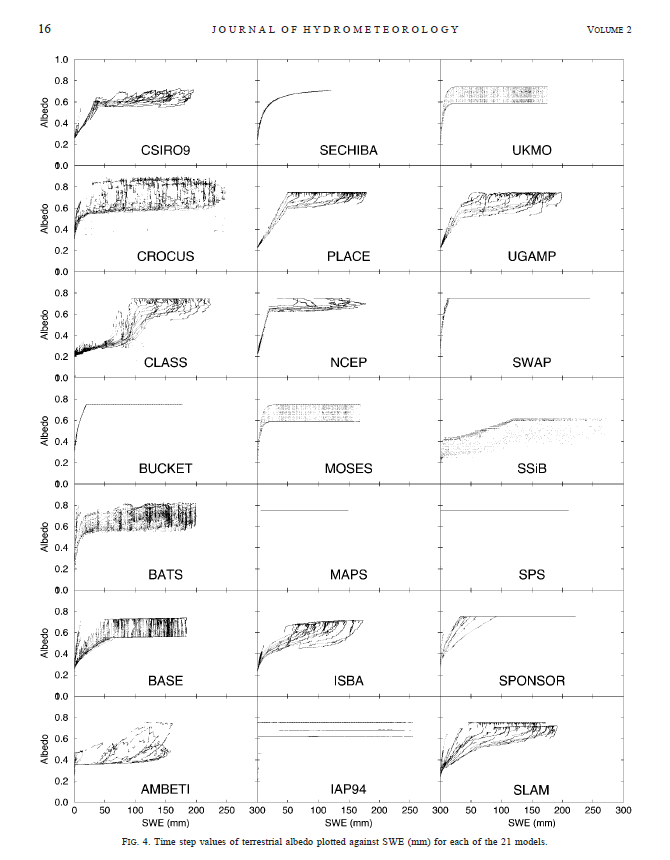


Reference Paper: Slater, A. G., Schlosser, C. A., Desborough, C. E., Pitman, A. J., Henderson-Sellers, A., Robock, A., et al. (2001). The Representation of Snow in Land Surface Schemes: Results from PILPS 2(d). Journal of Hydrometeorology, 2(1), 7–25. https://doi.org/10.1175/1525-7541(2001)002<0007:TROSIL>2.0.CO;2


## Problem 4: Project Update

## References:
- Lab 4-1 (Available here:https://mountain-hydrology-research-group.github.io/data-analysis/modules/lab4/lab4-1.ipynb)
- Lab 4-2 (Available here:https://mountain-hydrology-research-group.github.io/data-analysis/modules/lab4/lab4-2.ipynb)
- Lab 4-3 (Available here:https://mountain-hydrology-research-group.github.io/data-analysis/modules/lab4/lab4-3.ipynb)
